<a href="https://colab.research.google.com/github/raqueeb/ml-python/blob/master/colab/decision_boundary_feature_importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# আইরিস এর ডিসিশন বাউন্ডারি 

**আমাদের ট্রেনিং এবং ভিজ্যুয়ালাইজেশন **

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

**ডিসিশন বাউন্ডারি প্লটিং **

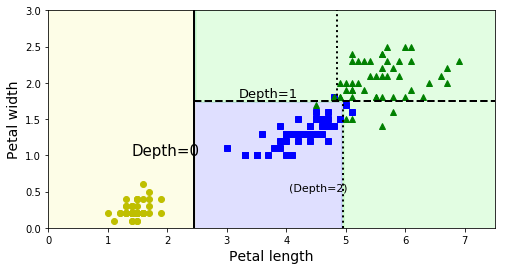

In [2]:
# অরালিয়েন জেরোনের বইটা থেকে নেয়া 

# Common imports
import numpy as np
import os

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

**ডিসিশন ট্রি খালি চোখে দেখা **

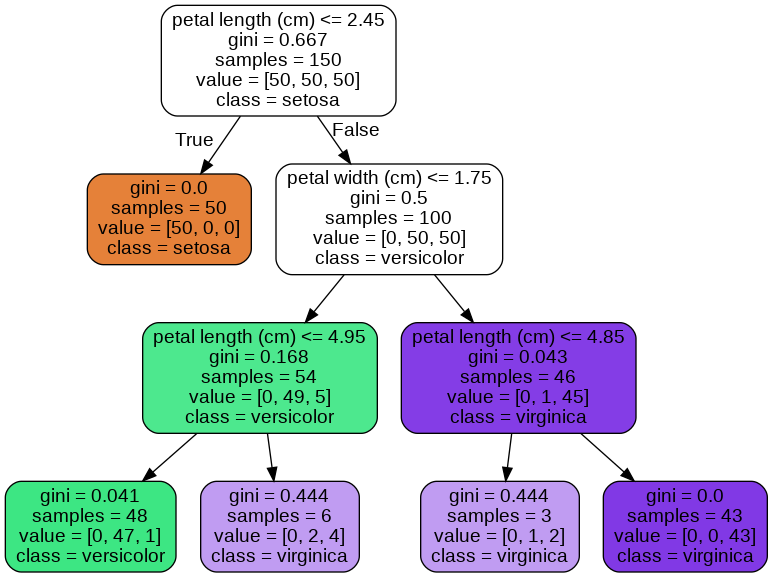

In [3]:
from sklearn.tree import export_graphviz
from graphviz import Source

export_graphviz(
        tree_clf,
        out_file='tree.dot',
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

# আমাদের দরকারি ফরম্যাটে ছবিতে পাল্টে নেই, গুগল কোলাব হবার কারণে 
# আলাদা করে graphviz ইনস্টল করার প্রয়োজন নেই। জুপিটার নোটবুকে প্রয়োজন 
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png'])

#  আমাদের নোটবুকে ডিসপ্লে করি 
from IPython.display import Image
Image(filename = 'tree.png')

In [13]:
tree_clf.feature_importances_

array([0.        , 0.01351351, 0.55816482, 0.42832166])

In [17]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

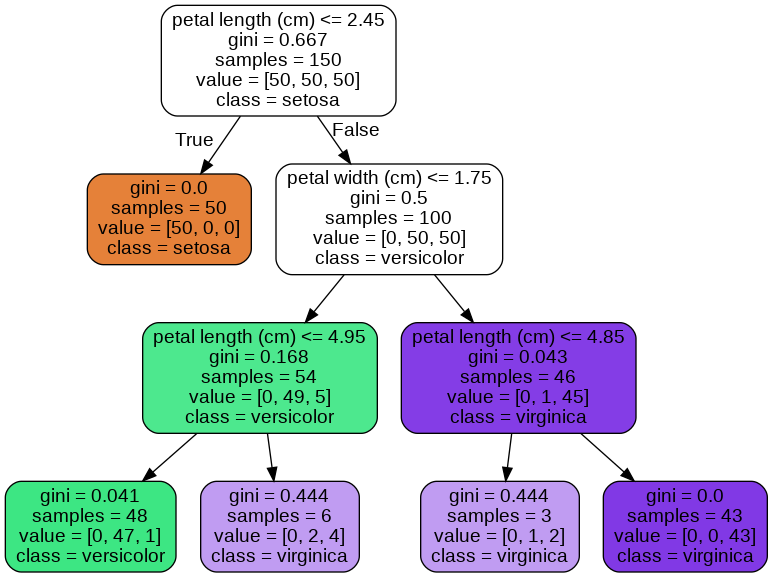

In [18]:
from sklearn.tree import export_graphviz
from graphviz import Source

export_graphviz(
        tree_clf,
        out_file='tree4.dot',
        feature_names=iris.feature_names,
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

# আমাদের দরকারি ফরম্যাটে ছবিতে পাল্টে নেই, গুগল কোলাব হবার কারণে 
# আলাদা করে graphviz ইনস্টল করার প্রয়োজন নেই। জুপিটার নোটবুকে প্রয়োজন 
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree4.png'])

#  আমাদের নোটবুকে ডিসপ্লে করি 
from IPython.display import Image
Image(filename = 'tree4.png')

In [25]:
tree_clf.feature_importances_

array([0.        , 0.01351351, 0.55816482, 0.42832166])

In [20]:
for name, score in zip(iris["feature_names"], tree_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.0
sepal width (cm) 0.01351351351351351
petal length (cm) 0.5581648224311269
petal width (cm) 0.42832166405535965


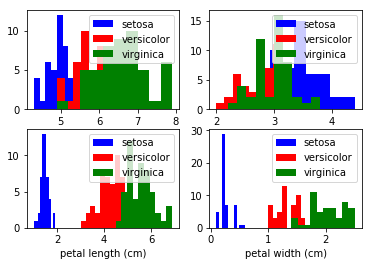

In [24]:
colors = ['blue', 'red', 'green']
# plot histogram
for feature in range(iris.data.shape[1]): # (shape = 150, 4)
    plt.subplot(2, 2, feature+1) # subplot starts from 1 (not 0)
    for label, color in zip(range(len(iris.target_names)), colors):
        # find the label and plot the corresponding data
        plt.hist(iris.data[iris.target==label, feature],
                 label=iris.target_names[label],
                 color=color)
    plt.xlabel(iris.feature_names[feature])
    plt.legend()
plt.show()